<a href="https://colab.research.google.com/github/NoeDebrois/Artificial-NN-and-Deep-Learning/blob/main/At_Home_Exercise_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Noé Debrois

### 📜 TODO Exercise - Exercise Session 1 :
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="800">


In [69]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(seed)
print(f"TensorFlow version {tf.__version__}")

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=14)
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

TensorFlow version 2.17.0


In [70]:
# Load Data
os.environ["DATASET_NAME"] = "penguins.csv"
os.environ["DATASET_URL"] = "1qn1P6_KW08wGRfSkTlzBoDCyVb18T3Lk"
if not os.path.exists(os.environ["DATASET_NAME"]):
    print("Downloading data...")
    ! gdown -q ${DATASET_URL}
    print("Download completed")
else:
    print("Data already downloaded. Using cached data...")
dataset = pd.read_csv('penguins.csv')

Data already downloaded. Using cached data...


### 🔎 Inspect Data

In [71]:
# Print the shape of the Penguins dataset
print('Penguins dataset shape', dataset.shape)

# Remove NaN
dataset.dropna(inplace=True)

# Display the first 10 rows of the Iris dataset
dataset.head(10)

Penguins dataset shape (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [72]:
# Print the shape of the Penguins dataset
print('Penguins dataset shape', dataset.shape)

# Generate summary statistics for the Penguins dataset
dataset.describe()

Penguins dataset shape (333, 7)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [73]:
# Get the target values from the Penguins dataset
# Here, the target = the species
target = dataset.species
print('Target shape', target.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(target, return_counts=True)
print('Target labels:', unique)
cpt = 0
for u in unique:
    print(f'Class {u} has {count[cpt]} samples')
    cpt+=1

Target shape (333,)
Target labels: ['Adelie' 'Chinstrap' 'Gentoo']
Class Adelie has 146 samples
Class Chinstrap has 68 samples
Class Gentoo has 119 samples


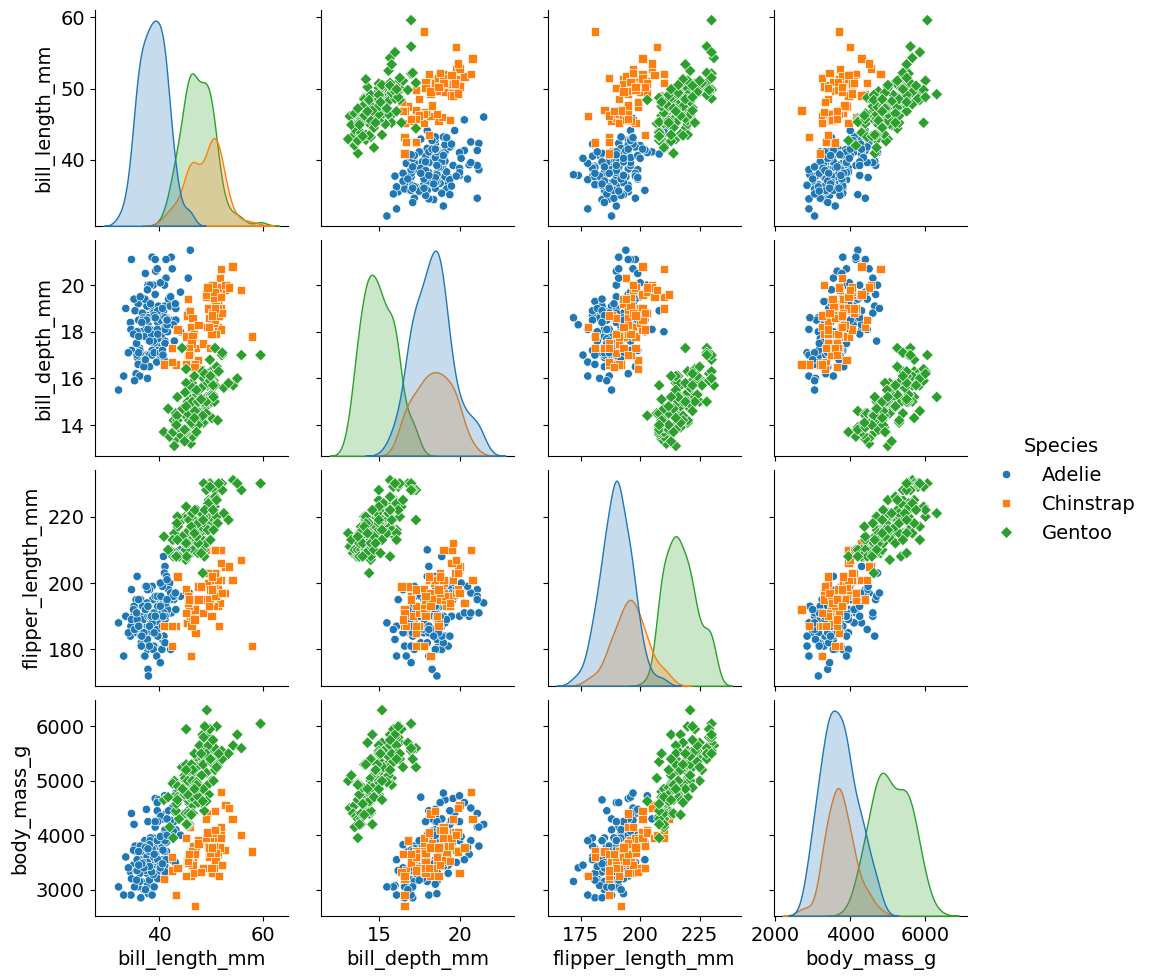

In [74]:
# Copy the Penguins dataset
plot_dataset = dataset.copy()

# Assign target labels to the dataset
plot_dataset["Species"] = target

# Plot using seaborn pairplot
sns.pairplot(plot_dataset, hue="Species", palette="tab10", markers=["o", "s", "D"])
plt.show()

# Clean up by deleting the temporary dataset
del plot_dataset

In [75]:
# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    dataset,
    target,
    test_size=20,
    random_state=seed,
    stratify=target
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=20,
    random_state=seed,
    stratify=y_train_val
)

# Print the shapes of the resulting sets
print('Training set shape:\t', X_train.shape, y_train.shape)
print('Validation set shape:\t', X_val.shape, y_val.shape)
print('Test set shape:\t\t', X_test.shape, y_test.shape)

Training set shape:	 (293, 7) (293,)
Validation set shape:	 (20, 7) (20,)
Test set shape:		 (20, 7) (20,)


### 🔄 Process Data

In [76]:
# Compute maximum values for each feature
max_df = X_train[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].max()

# Display maximum values
print('Penguins dataset maximum values')
print(max_df)

# Compute minimum values for each feature
min_df = X_train[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].min()

# Display minimum values
print('\nPenguins dataset minimum values')
print(min_df)

Penguins dataset maximum values
bill_length_mm         59.6
bill_depth_mm          21.2
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

Penguins dataset minimum values
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64


In [77]:
# Normalise training data
X_train = (X_train[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]] - min_df) / (max_df - min_df)

# Normalise validation data
X_val = (X_val[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]] - min_df) / (max_df - min_df)

# Normalise test data
X_test = (X_test[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]] - min_df) / (max_df - min_df)

In [78]:
# Display summary statistics of the normalised training data
X_train.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,293.000000,293.000000,293.000000,293.000000
mean,0.432616,0.504108,0.494591,0.421786
std,0.197361,0.245145,0.238548,0.225843
min,0.000000,0.000000,0.000000,0.000000
25%,0.261818,0.308642,0.305085,0.236111
50%,0.436364,0.518519,0.423729,0.375000
75%,0.607273,0.691358,0.711864,0.569444
max,1.000000,1.000000,1.000000,1.000000


In [79]:
# Preparation of the one-hot encoding : convert the strings 'Adelie', etc. to int :
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder on all unique labels
encoder.fit(pd.concat([y_train, y_val, y_test]))

# Transform labels to numerical representation
y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

# Now you can apply one-hot encoding
y_train = tfk.utils.to_categorical(y_train, num_classes=len(unique))
y_val = tfk.utils.to_categorical(y_val, num_classes=len(unique))
y_test = tfk.utils.to_categorical(y_test, num_classes=len(unique))

# Display shapes of the encoded label sets
print('Training set target shape:\t', y_train.shape)
print('Validation set target shape:\t', y_val.shape)
print('Test set target shape:\t\t', y_test.shape)

Training set target shape:	 (293, 3)
Validation set target shape:	 (20, 3)
Test set target shape:		 (20, 3)


In [80]:
# Determine the input shape, corresponding to the number of features
input_shape = X_train.shape[1:]
print(f'Input shape of the network {input_shape}')

# Determine the output shape, corresponding to the number of classes
output_shape = y_train.shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (4,)
Output shape of the network 3


### 🧮 Define Network Parameters

In [81]:
# Batch size: number of samples processed in each training iteration
batch_size = 16

# Number of epochs: times the entire dataset is passed through the network during training
epochs = 500

# Learning rate: step size for updating the model's weights
learning_rate = 0.001

### 🛠️ Build the Model

In [82]:
def build_model(
    input_shape=input_shape,
    output_shape=output_shape,
    learning_rate=learning_rate,
    seed=seed
):

    # Fix randomness
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    inputs = tfkl.Input(shape=input_shape, name='Input')

    # Add hidden layer with ReLU activation
    x = tfkl.Dense(units=16, name='Hidden')(inputs)
    x = tfkl.Activation('relu', name='HiddenActivation')(x)

    # Add output layer with softmax activation
    x = tfkl.Dense(units=output_shape, name='Output')(x)
    outputs = tfkl.Activation('softmax', name='Softmax')(x)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=inputs, outputs=outputs, name='FeedforwardNeuralNetwork')

    # Compile the model with loss, optimizer, and metrics
    loss = tfk.losses.CategoricalCrossentropy()
    optimizer = tfk.optimizers.Adam(learning_rate)
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

Model: "FeedforwardNeuralNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Input (InputLayer)                  │ (None, 4)                    │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Hidden (Dense)                      │ (None, 16)                   │            80 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ HiddenActivation (Activation)       │ (None, 16)                   │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Output (Dense)                      │ (None, 3)                    │            51 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Softmax (Activation)                │ (None, 3)                    │             0 │    -    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

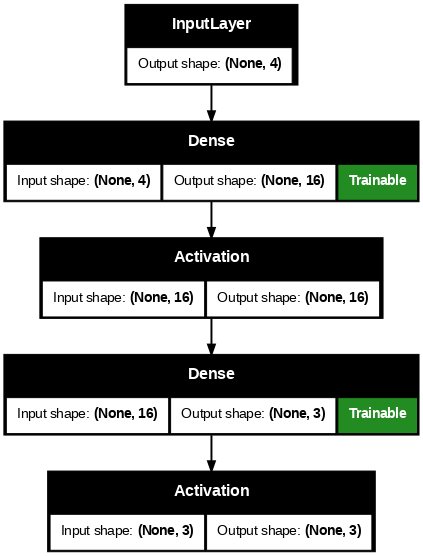

In [83]:
# Build the model with specified input and output shapes
model = build_model()

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

### 🧠 Train the Model

In [84]:
# Train the model and store the training history
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
).history

# Calculate the final validation accuracy
final_val_accuracy = round(history['val_accuracy'][-1] * 100, 2)

# Save the trained model to a file with the accuracy included in the filename
model_filename = f'Penguins_Feedforward_{final_val_accuracy}.keras'
model.save(model_filename)

# Delete the model to free up memory resources
del model

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3658 - loss: 1.0602 - val_accuracy: 0.4500 - val_loss: 1.0224
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5147 - loss: 1.0123 - val_accuracy: 0.7500 - val_loss: 0.9815
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7242 - loss: 0.9703 - val_accuracy: 0.7500 - val_loss: 0.9485
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7688 - loss: 0.9359 - val_accuracy: 0.7500 - val_loss: 0.9189
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7715 - loss: 0.9078 - val_accuracy: 0.7500 - val_loss: 0.8944
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7715 - loss: 0.8828 - val_accuracy: 0.7500 - val_loss: 0.8729
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7796 - loss: 0.8597 - val_accuracy: 0.7500 - val_loss: 0.8510
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7828 - loss: 0.8369 - val_accuracy: 0.8000 - 

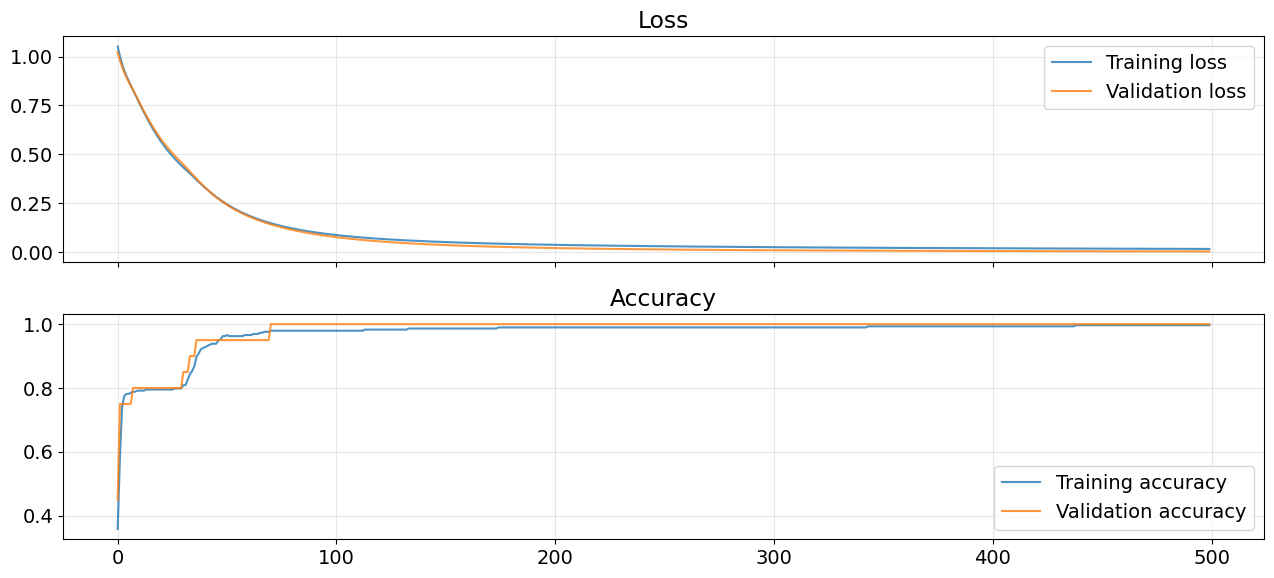

In [86]:
# Create a figure with two vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 6), sharex=True)

# Plot training and validation loss
ax1.plot(history['loss'], label='Training loss', alpha=.8)
ax1.plot(history['val_loss'], label='Validation loss', alpha=.8)
ax1.set_title('Loss')
ax1.legend()
ax1.grid(alpha=.3)

# Plot training and validation accuracy
ax2.plot(history['accuracy'], label='Training accuracy', alpha=.8)
ax2.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
ax2.set_title('Accuracy')
ax2.legend()
ax2.grid(alpha=.3)

# Adjust the layout and display the plot
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

### 🕹️ Use the Model - Make Inference

**Binary Classification Metrics**

<img src="https://drive.google.com/uc?export=view&id=1dUVBtRp6yJmfr1-cwUmWtKX2UfgozNaj" width="250"/>

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

$\text{Precision} = \frac{TP}{TP + FP}$

$\text{Recall} = \frac{TP}{TP + FN}$

$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

&nbsp;

---

**Multiclass Classification Metrics**

<img src="https://drive.google.com/uc?export=view&id=1yDfrbcjHPTqFx9P5ZPhi07S5XVcXjd6g" width="300"/>

$\text{Accuracy} = \sum_{i=1}^{N} \frac{TP_i}{TP_i + TN_i + FP_i + FN_i}$

$\text{Precision}_i = \frac{TP_i}{TP_i + FP_i}$

$\text{Recall}_i = \frac{TP_i}{TP_i + FN_i}$

$F1_i = 2 \cdot \frac{\text{Precision}_i \cdot \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}$

&nbsp;

**Macro Averaging**

$\text{Precision}_{macro} = \frac{1}{N} \sum_{i=1}^{N} \text{Precision}_i$

$\text{Recall}_{macro} = \frac{1}{N} \sum_{i=1}^{N} \text{Recall}_i$

$F1_{macro} = \frac{1}{N} \sum_{i=1}^{N} F1_i$

&nbsp;

**Weighted Macro Averaging**

$\text{Precision}_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times \text{Precision}_i \right)$

$\text{Recall}_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times \text{Recall}_i \right)$

$F1_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times F1_i \right)$


Model: "FeedforwardNeuralNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Input (InputLayer)                  │ (None, 4)                    │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Hidden (Dense)                      │ (None, 16)                   │            80 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ HiddenActivation (Activation)       │ (None, 16)                   │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Output (Dense)                      │ (None, 3)                    │            51 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Softmax (Activation)                │ (None, 3)                    │             0 │    -    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 395 (1.55 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264 (1.04 KB)

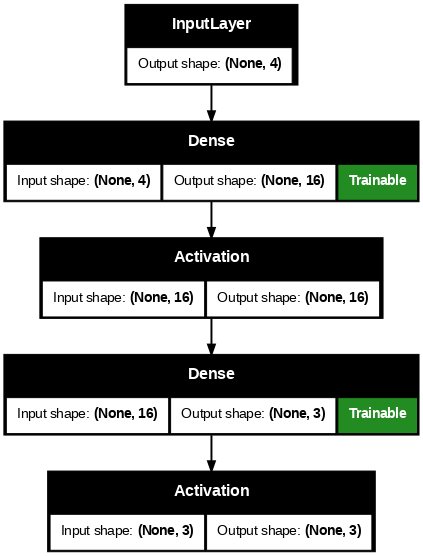

In [89]:
# Load the saved model
model = tfk.models.load_model(f'Penguins_Feedforward_{final_val_accuracy}.keras')

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

### 💹 Metrics on the train set, validation set, and finally the test set :

Accuracy score over the train set: 0.9966
Precision score over the train set: 0.9966
Recall score over the train set: 0.9966
F1 score over the train set: 0.9966


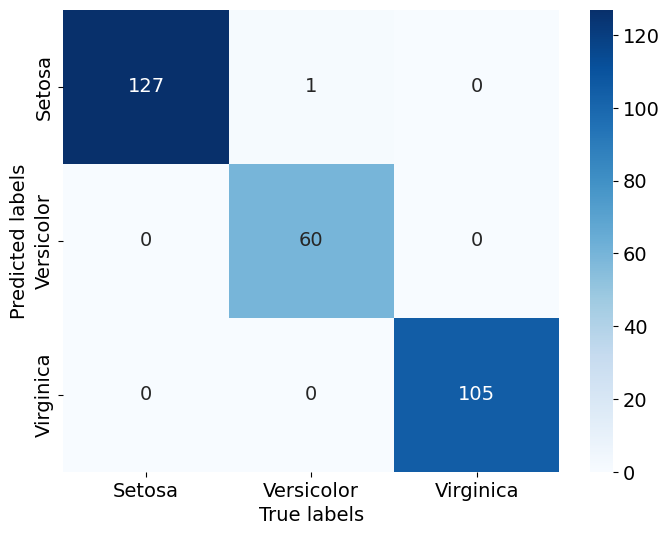

In [90]:
# Predict class probabilities and get predicted classes
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions, axis=-1)

# Extract ground truth classes
train_gt = np.argmax(y_train, axis=-1)

# Calculate and display training set accuracy
train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy, 4)}')

# Calculate and display training set precision
train_precision = precision_score(train_gt, train_predictions, average='weighted')
print(f'Precision score over the train set: {round(train_precision, 4)}')

# Calculate and display training set recall
train_recall = recall_score(train_gt, train_predictions, average='weighted')
print(f'Recall score over the train set: {round(train_recall, 4)}')

# Calculate and display training set F1 score
train_f1 = f1_score(train_gt, train_predictions, average='weighted')
print(f'F1 score over the train set: {round(train_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(train_gt, train_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

Accuracy score over the validation set: 1.0
Precision score over the validation set: 1.0
Recall score over the validation set: 1.0
F1 score over the validation set: 1.0


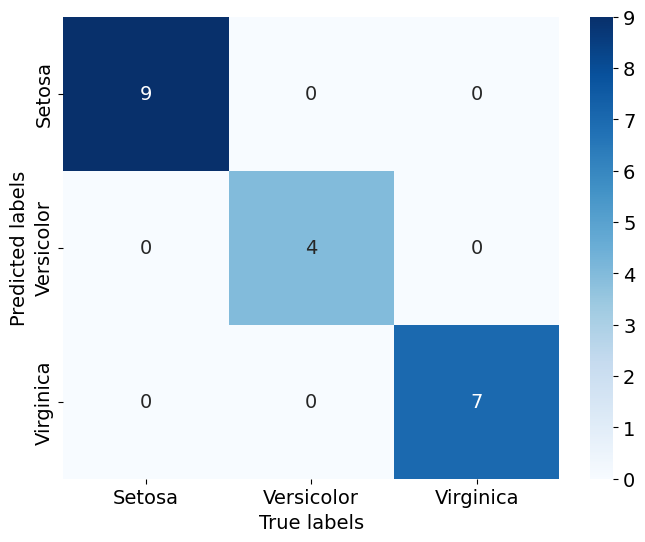

In [91]:
# Predict class probabilities and get predicted classes
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

# Extract ground truth classes
val_gt = np.argmax(y_val, axis=-1)

# Calculate and display validation set accuracy
val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

# Calculate and display validation set precision
val_precision = precision_score(val_gt, val_predictions, average='weighted')
print(f'Precision score over the validation set: {round(val_precision, 4)}')

# Calculate and display validation set recall
val_recall = recall_score(val_gt, val_predictions, average='weighted')
print(f'Recall score over the validation set: {round(val_recall, 4)}')

# Calculate and display validation set F1 score
val_f1 = f1_score(val_gt, val_predictions, average='weighted')
print(f'F1 score over the validation set: {round(val_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(val_gt, val_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

Accuracy score over the test set: 1.0
Precision score over the test set: 1.0
Recall score over the test set: 1.0
F1 score over the test set: 1.0


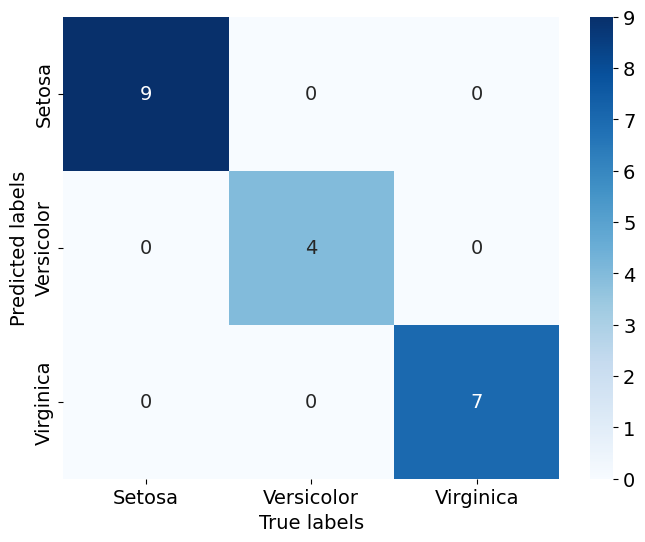

In [92]:
# Predict class probabilities and get predicted classes
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

# Extract ground truth classes
test_gt = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

# Calculate and display test set precision
test_precision = precision_score(test_gt, test_predictions, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')

# Calculate and display test set recall
test_recall = recall_score(test_gt, test_predictions, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')

# Calculate and display test set F1 score
test_f1 = f1_score(test_gt, test_predictions, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(test_gt, test_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()